In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ml-olympiad-ai-ml-malaysia/sample_submission.csv
/kaggle/input/ml-olympiad-ai-ml-malaysia/train.csv
/kaggle/input/ml-olympiad-ai-ml-malaysia/test.csv


In [2]:
data_train = pd.read_csv("/kaggle/input/ml-olympiad-ai-ml-malaysia/train.csv")
data_test = pd.read_csv("/kaggle/input/ml-olympiad-ai-ml-malaysia/test.csv")

## Dataset Description
#### id : Customer ID
#### 02 : Gender (categorical)
#### 03 : Date of Birth of the applicant
#### 04 : Lead Creation Date
#### 05 : City Code (categorical)
#### 06 : Area Code (categorical)
#### 07 : Employer Code (categorical)
#### 08 : Employer Category1 (categorical)
#### 09 : Employer Category2 (categorical)
#### 10 : Monthly Income
#### 11 : Bank Code
#### 12 : Bank Account Type (categorical)
#### 13 : Marketing Source (categorical)
#### 14 : Marketing_Category1 (categorical)
#### 15 : Marketing_Category2 (categorical)
#### 16 : Current Loan Installment
#### 17 : Requested Loan Amount
#### 18 : Loan Repayment (Years)
#### 19 : Interest Rate
#### 20 : Requested Loan Installment
#### class : Loan Approval Status (Yes=1, No=0)

In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55760 entries, 0 to 55759
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      55760 non-null  int64  
 1   02      55760 non-null  int64  
 2   03      55752 non-null  object 
 3   04      55760 non-null  object 
 4   05      55760 non-null  int64  
 5   06      55102 non-null  float64
 6   07      55760 non-null  int64  
 7   08      52567 non-null  float64
 8   09      52336 non-null  float64
 9   10      55760 non-null  float64
 10  11      55760 non-null  int64  
 11  12      48289 non-null  float64
 12  13      55760 non-null  int64  
 13  14      55760 non-null  int64  
 14  15      55760 non-null  int64  
 15  16      55719 non-null  float64
 16  17      33629 non-null  float64
 17  18      33629 non-null  float64
 18  19      17819 non-null  float64
 19  20      55719 non-null  float64
 20  class   55760 non-null  int64  
dtypes: float64(10), int64(9), object(2)

In [4]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13940 entries, 0 to 13939
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      13940 non-null  int64  
 1   02      13940 non-null  int64  
 2   03      13933 non-null  object 
 3   04      13940 non-null  object 
 4   05      13940 non-null  int64  
 5   06      13784 non-null  float64
 6   07      13940 non-null  int64  
 7   08      13115 non-null  float64
 8   09      13066 non-null  float64
 9   10      13940 non-null  float64
 10  11      13940 non-null  int64  
 11  12      12023 non-null  float64
 12  13      13940 non-null  int64  
 13  14      13940 non-null  int64  
 14  15      13940 non-null  int64  
 15  16      13930 non-null  float64
 16  17      8366 non-null   float64
 17  18      8366 non-null   float64
 18  19      4452 non-null   float64
 19  20      13930 non-null  float64
dtypes: float64(10), int64(8), object(2)
memory usage: 2.1+ MB


In [5]:
test_col_names = ["ID","Gender","DOB","Lead Creation Date","City code", "Area code","Employer code",\
              "Emp Cat1","Emp Cat2", "Monthly income", "Bank code", "Bank account type",\
              "Marketing source","Marketing Cat1", "Marketing Cat2", "Current loan installment",\
              "Requested Loan Amount","Loan Repayment (Year)", "Interest Rate","Requested Loan Installment"]
train_col_names = test_col_names.copy()
train_col_names.append("class")

#reassign the column names
data_train = data_train.set_axis(train_col_names, axis=1)
data_test = data_test.set_axis(test_col_names, axis=1)

display(data_train)
display(data_test)

,ID,Gender,DOB,Lead Creation Date,City code,Area code,Employer code,Emp Cat1,Emp Cat2,Monthly income,...,Bank account type,Marketing source,Marketing Cat1,Marketing Cat2,Current loan installment,Requested Loan Amount,Loan Repayment (Year),Interest Rate,Requested Loan Installment,class
0,-2267620335683202440,0,1992-08-19,2016-07-26,4195062457429987311,1.0,5451653042631526903,2.0,4.0,2415.000,...,2.0,5,3,4,0.00,40950.0,5.0,NaN,0.00,0
1,6983777496993703358,1,1975-03-17,2016-02-14,-6228735452334436716,3.0,8322794614403,NaN,NaN,2625.000,...,NaN,1,7,0,0.00,NaN,NaN,NaN,0.00,0
2,-9000875829172115247,1,1983-04-07,2016-07-27,4195062457429987311,1.0,7958738730440449375,2.0,4.0,6772.500,...,1.0,4,2,10,2063.04,21000.0,5.0,15.190,2063.04,0
3,4577133526371079450,0,1975-01-23,2016-08-23,630300624900511972,1.0,-5322077886952523742,1.0,3.0,7980.000,...,1.0,4,2,10,1575.00,NaN,NaN,NaN,1575.00,0
4,5683986052858780477,0,1994-06-27,2016-07-21,4195062457429987311,1.0,-974246632625402816,2.0,4.0,945.000,...,1.0,4,3,0,0.00,NaN,NaN,NaN,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55755,6797779403213407867,1,1989-10-14,2016-02-13,7661641590761461231,2.0,2481757572251108759,1.0,4.0,3675.000,...,1.0,6,2,10,242.55,26250.0,4.0,14.553,242.55,0
55756,3734307013326764244,0,1991-01-12,2016-07-24,1322416564569257070,1.0,3409321549050670041,2.0,4.0,2100.000,...,2.0,5,2,4,0.00,47250.0,5.0,19.600,0.00,0
55757,7053200079724995837,0,1987-10-27,2016-10-05,-6089507668103549947,3.0,5519217478565879082,1.0,4.0,2047.500,...,1.0,1,7,0,840.00,NaN,NaN,NaN,840.00,0
55758,5563488093892579957,0,1994-11-01,2016-07-23,4195062457429987311,1.0,7616879545308871088,2.0,4.0,1451.835,...,1.0,4,2,0,441.00,NaN,NaN,NaN,441.00,0


,ID,Gender,DOB,Lead Creation Date,City code,Area code,Employer code,Emp Cat1,Emp Cat2,Monthly income,Bank code,Bank account type,Marketing source,Marketing Cat1,Marketing Cat2,Current loan installment,Requested Loan Amount,Loan Repayment (Year),Interest Rate,Requested Loan Installment
0,4994603093964685097,1,1976-05-28,2016-08-27,5969016085647965848,3.0,-1583851805195383176,1.0,4.0,1155.0,-4438975989796485538,2.0,4,2,2,176.925,10500.0,4.0,34.790,176.925
1,6719898245964184851,1,1986-05-22,2016-06-12,3466152762937442713,1.0,3291646035407655386,2.0,4.0,3150.0,-5682066992016760665,1.0,1,2,10,1155.000,34650.0,4.0,NaN,1155.000
2,1194292741480147233,1,1992-09-24,2016-10-13,-5413728021433296369,1.0,-5282084624191443479,1.0,4.0,2310.0,4934588897315644940,1.0,4,3,2,0.000,33600.0,5.0,19.600,0.000
3,3961870163330977259,0,1994-02-05,2016-03-12,-5413728021433296369,1.0,768741222651021646,2.0,4.0,1470.0,-4438975989796485538,2.0,4,3,0,0.000,NaN,NaN,NaN,0.000
4,-275724253865532087,0,1992-08-22,2016-09-23,630300624900511972,1.0,-2992289926877962833,2.0,4.0,2415.0,-4438975989796485538,2.0,1,7,4,472.500,NaN,NaN,NaN,472.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13935,8633405915199646970,0,1990-12-22,2016-09-21,630300624900511972,1.0,-5122065470464514482,1.0,4.0,5932.5,-2894846774513267556,1.0,1,7,10,0.000,NaN,NaN,NaN,0.000
13936,8771549977412369984,0,1985-07-30,2016-09-22,8322794614403,NaN,8631178485930553909,3.0,4.0,2625.0,8322794614403,NaN,1,7,0,0.000,NaN,NaN,NaN,0.000
13937,3975323562176563348,1,1987-04-28,2016-01-14,4195062457429987311,1.0,7949572066056611526,2.0,4.0,1942.5,4934588897315644940,1.0,1,7,2,157.500,31500.0,5.0,17.885,157.500
13938,-4797734754001333778,1,1976-06-19,2016-09-27,4195062457429987311,1.0,194240131177123668,2.0,4.0,1732.5,4934588897315644940,1.0,1,7,2,0.000,27300.0,4.0,30.870,0.000


In [6]:
#drop id, dates column

data_train.drop(['ID','DOB','Lead Creation Date'], axis=1, inplace=True)
data_test.drop(['ID','DOB','Lead Creation Date'], axis=1, inplace=True)

In [7]:
data_train.isna().sum()

Gender                            0
City code                         0
Area code                       658
Employer code                     0
Emp Cat1                       3193
Emp Cat2                       3424
Monthly income                    0
Bank code                         0
Bank account type              7471
Marketing source                  0
Marketing Cat1                    0
Marketing Cat2                    0
Current loan installment         41
Requested Loan Amount         22131
Loan Repayment (Year)         22131
Interest Rate                 37941
Requested Loan Installment       41
class                             0
dtype: int64

In [8]:
data_test.isna().sum()

Gender                           0
City code                        0
Area code                      156
Employer code                    0
Emp Cat1                       825
Emp Cat2                       874
Monthly income                   0
Bank code                        0
Bank account type             1917
Marketing source                 0
Marketing Cat1                   0
Marketing Cat2                   0
Current loan installment        10
Requested Loan Amount         5574
Loan Repayment (Year)         5574
Interest Rate                 9488
Requested Loan Installment      10
dtype: int64

array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'City code'}>,
        <Axes: title={'center': 'Area code'}>,
        <Axes: title={'center': 'Employer code'}>],
       [<Axes: title={'center': 'Emp Cat1'}>,
        <Axes: title={'center': 'Emp Cat2'}>,
        <Axes: title={'center': 'Monthly income'}>,
        <Axes: title={'center': 'Bank code'}>],
       [<Axes: title={'center': 'Bank account type'}>,
        <Axes: title={'center': 'Marketing source'}>,
        <Axes: title={'center': 'Marketing Cat1'}>,
        <Axes: title={'center': 'Marketing Cat2'}>],
       [<Axes: title={'center': 'Current loan installment'}>,
        <Axes: title={'center': 'Requested Loan Amount'}>,
        <Axes: title={'center': 'Loan Repayment (Year)'}>,
        <Axes: title={'center': 'Interest Rate'}>],
       [<Axes: title={'center': 'Requested Loan Installment'}>,
        <Axes: title={'center': 'class'}>, <Axes: >, <Axes: >]],
      dtype=object)

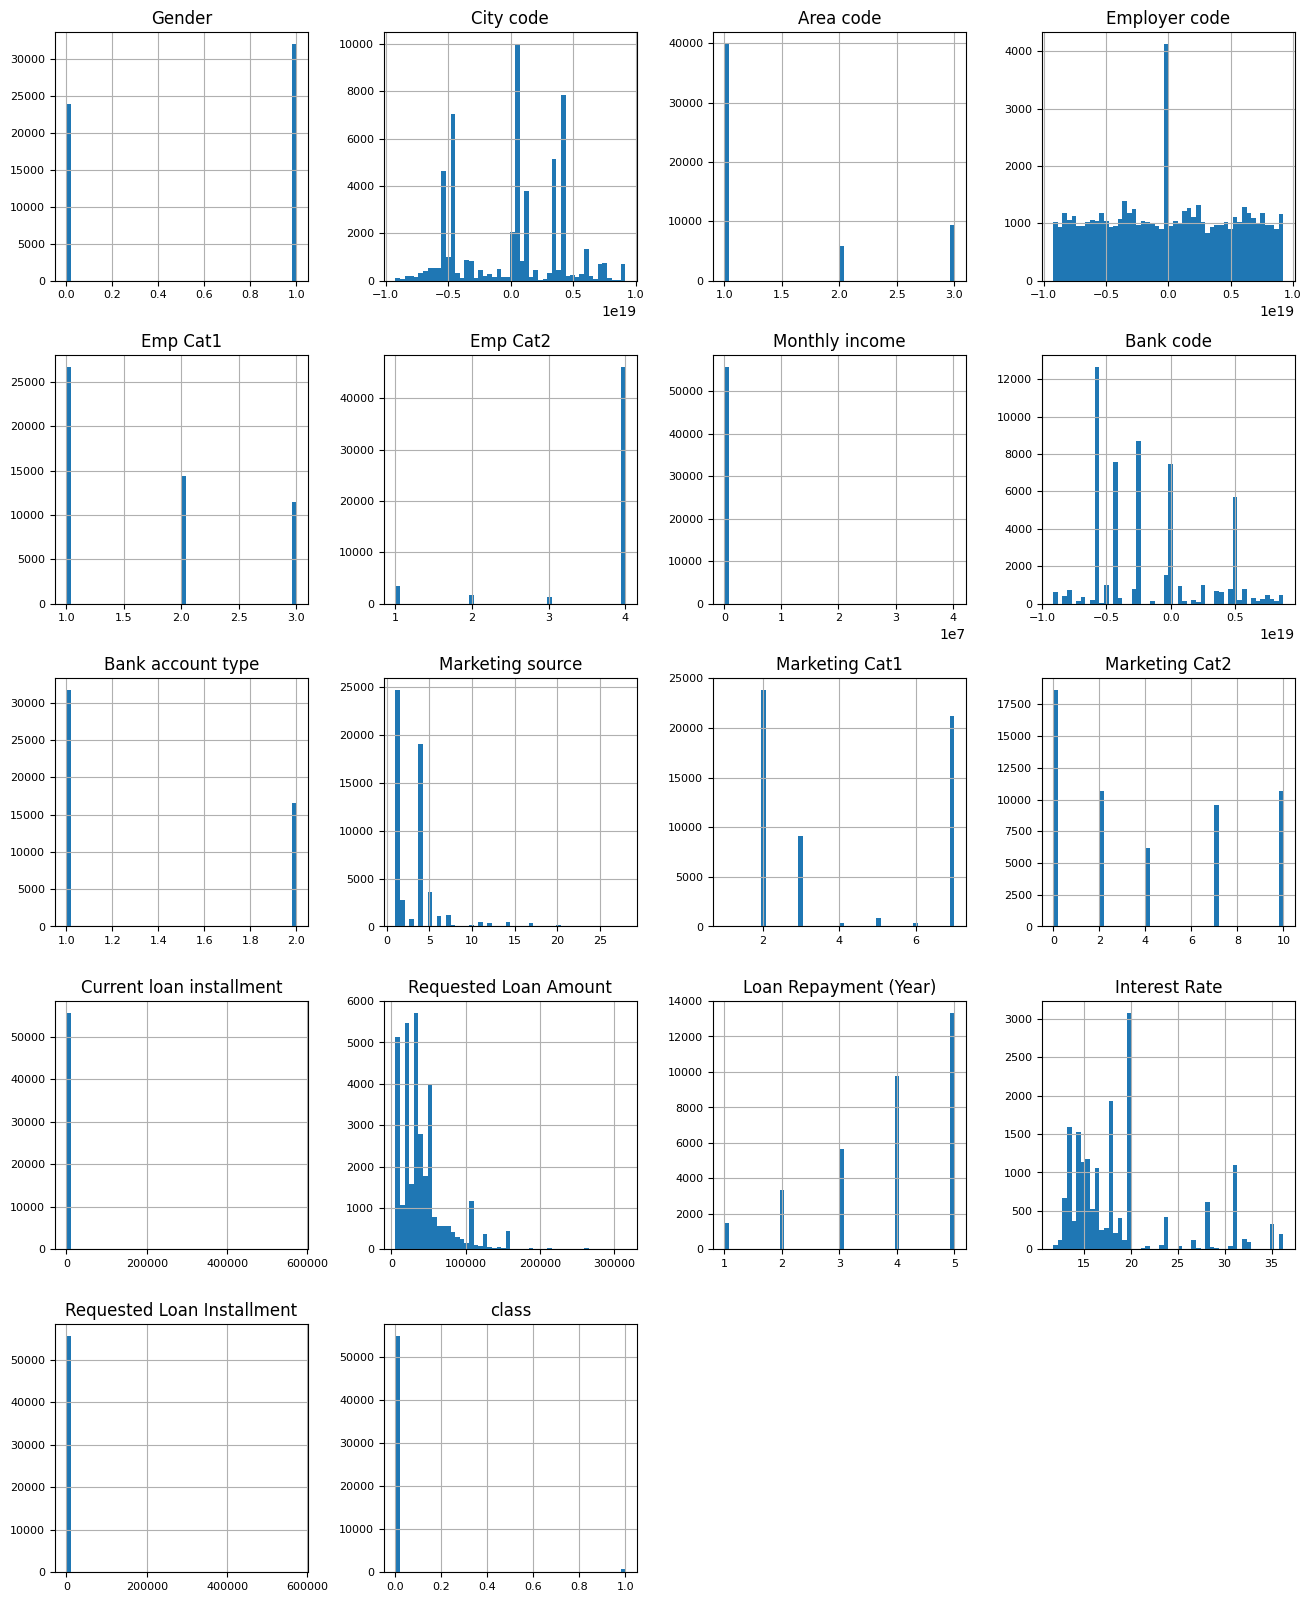

In [9]:
data_train.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [10]:
# Fill missing values with the mean of each column
data_train = data_train.fillna(data_train.median())

print(data_train)

       Gender            City code  Area code        Employer code  Emp Cat1  \
0           0  4195062457429987311        1.0  5451653042631526903       2.0   
1           1 -6228735452334436716        3.0        8322794614403       1.0   
2           1  4195062457429987311        1.0  7958738730440449375       2.0   
3           0   630300624900511972        1.0 -5322077886952523742       1.0   
4           0  4195062457429987311        1.0  -974246632625402816       2.0   
...       ...                  ...        ...                  ...       ...   
55755       1  7661641590761461231        2.0  2481757572251108759       1.0   
55756       0  1322416564569257070        1.0  3409321549050670041       2.0   
55757       0 -6089507668103549947        3.0  5519217478565879082       1.0   
55758       0  4195062457429987311        1.0  7616879545308871088       2.0   
55759       1   757457228617119463        2.0  -856474502062988360       1.0   

       Emp Cat2  Monthly income        

In [11]:
data_train.isna().sum()

Gender                        0
City code                     0
Area code                     0
Employer code                 0
Emp Cat1                      0
Emp Cat2                      0
Monthly income                0
Bank code                     0
Bank account type             0
Marketing source              0
Marketing Cat1                0
Marketing Cat2                0
Current loan installment      0
Requested Loan Amount         0
Loan Repayment (Year)         0
Interest Rate                 0
Requested Loan Installment    0
class                         0
dtype: int64

In [12]:
## independent and dependent variables
X = data_train.drop(['class'], axis=1)
y = data_train['class']

In [13]:
## train test split 80:20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(44608, 17) (44608,)
(11152, 17) (11152,)


In [14]:
## feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression

In [15]:
#Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state = 0)
LR.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [16]:
# Predicting the Test set results
y_pred = LR.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [17]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10991     0]
 [  161     0]]


In [18]:
from pylab import rcParams
import seaborn as sns; sns.set()

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

In [19]:
#to generate model report 
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " ,accuracy_score(y_actual,y_predicted))
    print("Precision = " ,precision_score(y_actual,y_predicted))
    print("Recall = " ,recall_score(y_actual,y_predicted))
    print("F1 Score = " ,f1_score(y_actual,y_predicted))
    pass

In [20]:
# to generate model measurement
generate_model_report(y_test, y_pred)

Accuracy =  0.9855631276901005
Precision =  0.0
Recall =  0.0
F1 Score =  0.0


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Decision Tree

In [21]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [22]:
# Predicting the Test set results
y_pred1 = DT.predict(X_test)
print(y_pred1)

[0 0 0 ... 0 0 0]


In [23]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred1)
print(cm)

[[10770   221]
 [  152     9]]


In [24]:
# to generate model measurement
generate_model_report(y_test, y_pred1)

Accuracy =  0.9665530846484935
Precision =  0.0391304347826087
Recall =  0.055900621118012424
F1 Score =  0.04603580562659847


## Naive Bayes

In [25]:
# Import the necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

#fitting naive bayes Classification to the Training set
nb = GaussianNB()
# Train the classifier
nb.fit(X_train, y_train)

GaussianNB()

In [26]:
# Predicting the Test set results
y_pred2 = nb.predict(X_test)
print(y_pred2)

[0 0 0 ... 0 0 1]


In [27]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred2)
print(cm)

[[9227 1764]
 [  75   86]]


In [28]:
# to generate model measurement
generate_model_report(y_test, y_pred2)

Accuracy =  0.835096843615495
Precision =  0.046486486486486484
Recall =  0.5341614906832298
F1 Score =  0.08552958727001492


## Use train Decision Tree to predict test data

In [29]:
# Fill missing values with the mean of each column
data_test = data_test.fillna(data_test.median())

print(data_test)

       Gender            City code  Area code        Employer code  Emp Cat1  \
0           1  5969016085647965848        3.0 -1583851805195383176       1.0   
1           1  3466152762937442713        1.0  3291646035407655386       2.0   
2           1 -5413728021433296369        1.0 -5282084624191443479       1.0   
3           0 -5413728021433296369        1.0   768741222651021646       2.0   
4           0   630300624900511972        1.0 -2992289926877962833       2.0   
...       ...                  ...        ...                  ...       ...   
13935       0   630300624900511972        1.0 -5122065470464514482       1.0   
13936       0        8322794614403        1.0  8631178485930553909       3.0   
13937       1  4195062457429987311        1.0  7949572066056611526       2.0   
13938       1  4195062457429987311        1.0   194240131177123668       2.0   
13939       0  3782342448181408906        1.0  1447463489554380912       3.0   

       Emp Cat2  Monthly income        

In [30]:
data_test.isna().sum()

Gender                        0
City code                     0
Area code                     0
Employer code                 0
Emp Cat1                      0
Emp Cat2                      0
Monthly income                0
Bank code                     0
Bank account type             0
Marketing source              0
Marketing Cat1                0
Marketing Cat2                0
Current loan installment      0
Requested Loan Amount         0
Loan Repayment (Year)         0
Interest Rate                 0
Requested Loan Installment    0
dtype: int64

In [31]:
## feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_test = scaler.fit_transform(data_test)

In [32]:
data_test.shape

(13940, 17)

In [33]:
x_pred = DT.predict(data_test)

In [34]:
# Creating pandas dataframe from numpy array
submission = pd.DataFrame({'id': np.arange(1,13941), 'class': x_pred})

In [35]:
submission.to_csv('my_submission.csv', index=False) 